In [1]:
%load_ext autoreload
%autoreload 2

from imports import *
from models import *
from utils import *
from data import *
from configs import CONFIGS, EXP_CODES

In [2]:
'''
load dataset
'''


config_name = 'freq'
config = deepcopy(CONFIGS[config_name])

train_dataset, test_dataset, train_loader, test_loader = get_dataset_dataloader(config)

100%|██████████| 5000/5000 [00:01<00:00, 4965.20it/s]


### True space

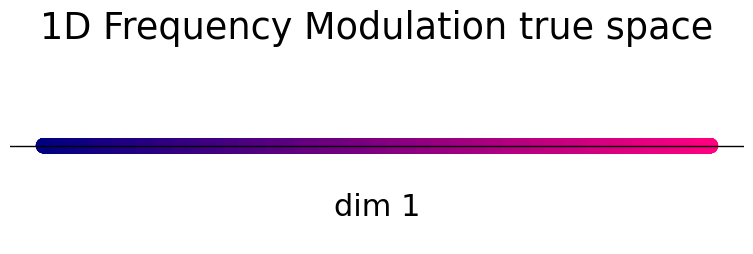

In [3]:
config_name = 'freq'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=10000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(8, 3))

# Create the scatter plot
ax.scatter(*gt_velocities.T, c=colors, s=100)


# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('1D Frequency Modulation true space')

plt.tight_layout()
plt.savefig('./figures/freq_true_space.png')

### Our results

In [4]:
config_name = 'freq'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_ours, transformed_pred_velocities_ours, fit_errors_ours, firing_rates_ours = [], [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = our_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    plt.ioff()
    fig = firing_rates(
        config,
        gt_velocities,
        transformed_pred_velocities,
        base_grid_period=0.1,
        resample_every=20,
    )
    plt.close(fig)
    plt.ion()

    pred_velocities_ours.append(pred_velocities)
    transformed_pred_velocities_ours.append(transformed_pred_velocities)
    fit_errors_ours.append(error)
    firing_rates_ours.append(fig)

In [5]:
firing_rates_ours[1].savefig('./figures/freq_ours_firing_rates.png')

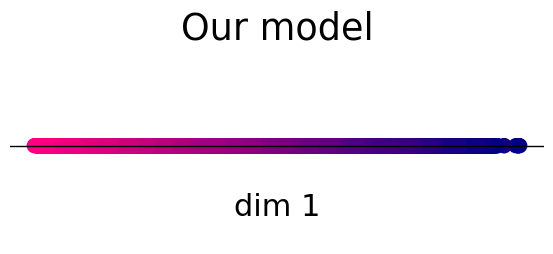

In [6]:
fig = plt.figure(figsize=(6, 3))

ax = plt.gca()


ax.scatter(*pred_velocities_ours[1].T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('Our model')

plt.tight_layout()
plt.savefig('./figures/freq_ours.png')

In [30]:
config_name = 'freq_2dim'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_2dim_ours, transformed_pred_velocities_2dim_ours, fit_errors_2dim_ours = [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = our_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    pred_velocities_2dim_ours.append(pred_velocities)
    transformed_pred_velocities_2dim_ours.append(transformed_pred_velocities)
    fit_errors_2dim_ours.append(error)

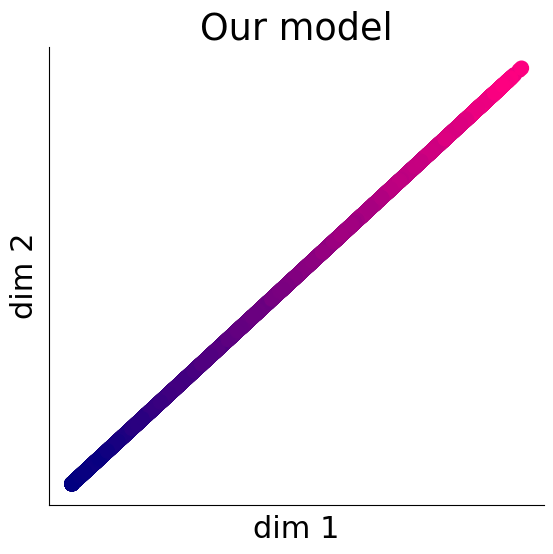

In [31]:
fig = plt.figure(figsize=(6, 6))

ax = plt.gca()


ax.scatter(*pred_velocities_2dim_ours[1].T, c=colors, s=100)

ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_title('Our model')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('./figures/freq_2dim_ours.png')

In [32]:
explained_variance(pred_velocities_2dim_ours[1])

array([1.0000000e+00, 5.3551625e-11], dtype=float32)

In [33]:
config_name = 'freq_3dim'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_3dim_ours, transformed_pred_velocities_3dim_ours, fit_errors_3dim_ours = [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = our_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    pred_velocities_3dim_ours.append(pred_velocities)
    transformed_pred_velocities_3dim_ours.append(transformed_pred_velocities)
    fit_errors_3dim_ours.append(error)

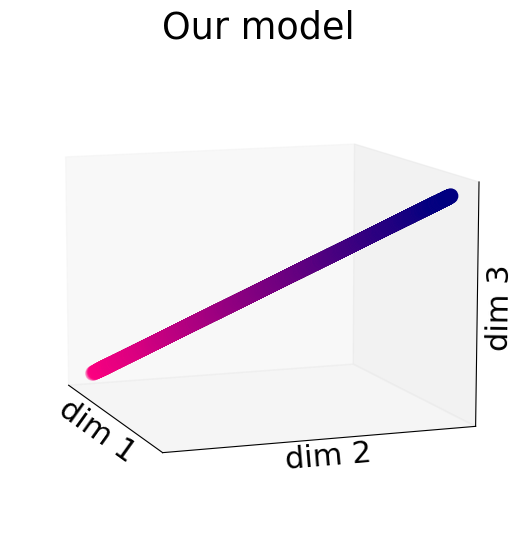

In [34]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*pred_velocities_3dim_ours[2].T, c=colors, s=100)


ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('Our model')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=10, azim=160.0)

plt.tight_layout()
plt.savefig('./figures/freq_3dim_ours.png')

In [35]:
explained_variance(pred_velocities_3dim_ours[2])

array([1.0000000e+00, 7.0638597e-09, 6.9177617e-15], dtype=float32)

### PCA results

In [13]:
config_name = 'freq'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



pca_pred_velocities = pca_reduction(
    trajectory,
    config,
    1,
)

fit_error_pca, pca_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    pca_pred_velocities,
)

plt.ioff()
pca_firing_rates = firing_rates(
    config,
    gt_velocities,
    pca_transformed_pred_velocities,
    base_grid_period=0.1,
    resample_every=20,
)
plt.close(pca_firing_rates)
plt.ion()

In [14]:
pca_firing_rates.savefig('./figures/freq_pca_firing_rates.png')

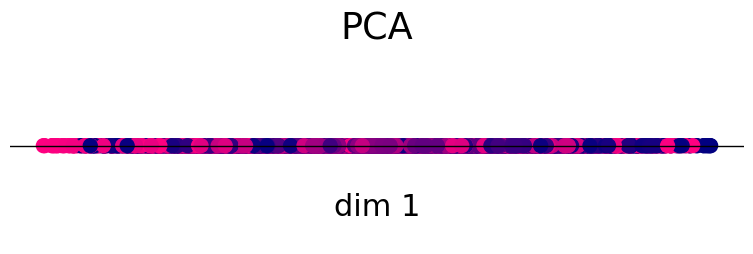

In [15]:
fig = plt.figure(figsize=(8, 3))

ax = plt.gca()


ax.scatter(*pca_pred_velocities.T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('PCA')

plt.tight_layout()
plt.savefig('./figures/freq_pca.png')

### Isomap results

In [16]:
config_name = 'freq'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



isomap_pred_velocities = isomap_reduction(
    trajectory,
    config,
    1,
)

fit_error_isomap, isomap_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    isomap_pred_velocities,
)

plt.ioff()
isomap_firing_rates = firing_rates(
    config,
    gt_velocities,
    isomap_transformed_pred_velocities,
    base_grid_period=0.1,
    resample_every=20,
)
plt.close(isomap_firing_rates)
plt.ion()

/home/abhi/miniconda3/envs/velocity/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 42 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/abhi/miniconda3/envs/velocity/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/abhi/miniconda3/envs/velocity/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/abhi/miniconda3/envs/velocity/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is

In [17]:
isomap_firing_rates.savefig('./figures/freq_isomap_firing_rates.png')

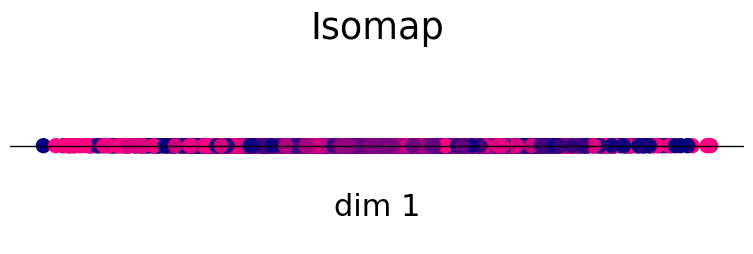

In [18]:
fig = plt.figure(figsize=(8, 3))

ax = plt.gca()


ax.scatter(*isomap_pred_velocities.T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('Isomap')

plt.tight_layout()
plt.savefig('./figures/freq_isomap.png')

### UMAP results

In [19]:
config_name = 'freq'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



umap_pred_velocities = umap_reduction(
    trajectory,
    config,
    1,
)

fit_error_umap, umap_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    umap_pred_velocities,
)

plt.ioff()
umap_firing_rates = firing_rates(
    config,
    gt_velocities,
    umap_transformed_pred_velocities,
    base_grid_period=0.1,
    resample_every=20,
)
plt.close(umap_firing_rates)
plt.ion()

/home/abhi/miniconda3/envs/velocity/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [20]:
umap_firing_rates.savefig('./figures/freq_umap_firing_rates.png')

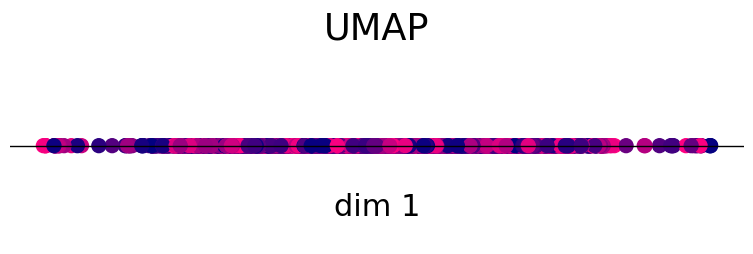

In [21]:
fig = plt.figure(figsize=(8, 3))

ax = plt.gca()


ax.scatter(*umap_pred_velocities.T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('UMAP')

plt.tight_layout()
plt.savefig('./figures/freq_umap.png')

### Autoencoder results

In [22]:
config_name = 'freq_ae'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_ae, transformed_pred_velocities_ae, fit_errors_ae, firing_rates_ae = [], [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = ae_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    plt.ioff()
    fig = firing_rates(
        config,
        gt_velocities,
        transformed_pred_velocities,
        base_grid_period=0.1,
        resample_every=20,
    )
    plt.close(fig)
    plt.ion()

    pred_velocities_ae.append(pred_velocities)
    transformed_pred_velocities_ae.append(transformed_pred_velocities)
    fit_errors_ae.append(error)
    firing_rates_ae.append(fig)

In [23]:
firing_rates_ae[0].savefig('./figures/freq_ae_firing_rates.png')

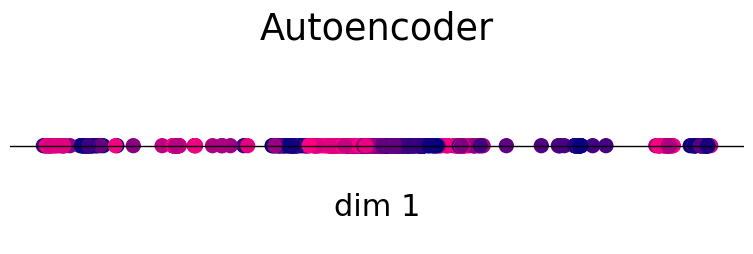

In [24]:
fig = plt.figure(figsize=(8, 3))

ax = plt.gca()


ax.scatter(*pred_velocities_ae[0].T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('Autoencoder')

plt.tight_layout()
plt.savefig('./figures/freq_ae.png')

### MCNet results

In [25]:
config_name = 'freq_mcnet'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_mcnet, transformed_pred_velocities_mcnet, fit_errors_mcnet, firing_rates_mcnet = [], [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = mcnet_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    plt.ioff()
    fig = firing_rates(
        config,
        gt_velocities,
        transformed_pred_velocities,
        base_grid_period=0.1,
        resample_every=20,
    )
    plt.close(fig)
    plt.ion()

    pred_velocities_mcnet.append(pred_velocities)
    transformed_pred_velocities_mcnet.append(transformed_pred_velocities)
    fit_errors_mcnet.append(error)
    firing_rates_mcnet.append(fig)

In [26]:
firing_rates_mcnet[0].savefig('./figures/freq_mcnet_firing_rates.png')

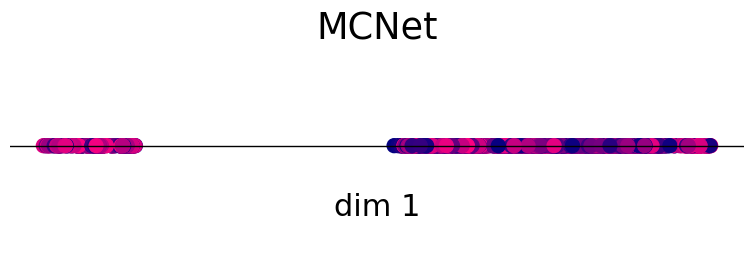

In [27]:
fig = plt.figure(figsize=(8, 3))

ax = plt.gca()


ax.scatter(*pred_velocities_mcnet[0].T, c=colors, s=100)

# Draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1.0)

# Remove y-axis and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout(pad=0)
plt.subplots_adjust(left=0.0, right=1.0, top=0.6, bottom=0.2)
ax.title.set_position([0.5, 1.0]) 
ax.xaxis.labelpad=-40

ax.set_xlabel('dim 1')
ax.set_title('MCNet')

plt.tight_layout()
plt.savefig('./figures/freq_mcnet.png')

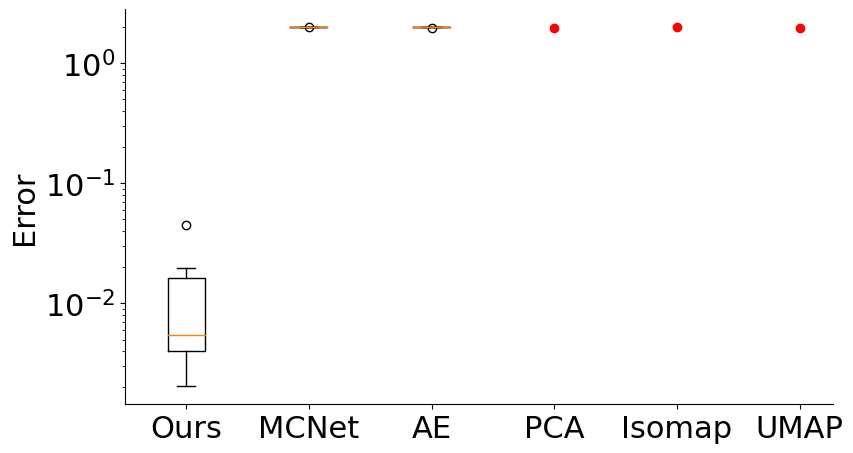

In [28]:
errors = [fit_errors_ours, fit_errors_mcnet, fit_errors_ae, [fit_error_pca], [fit_error_isomap], [fit_error_umap]]

# Create a box plot
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the box plot for experiments with multiple trials
boxplot_data = [e for e in errors if len(e) > 1]
ax.boxplot(boxplot_data, positions=[0, 1, 2])

# Plot the single trial errors as points
single_trial_positions = [3, 4, 5]
single_trial_errors = [e[0] for e in errors if len(e) == 1]
ax.plot(single_trial_positions, single_trial_errors, 'ro')  # 'ro' is for red dots

# Adjust x-axis labels to match the experiments
ax.set_xticks(range(len(errors)))
ax.set_xticklabels(['Ours', 'MCNet', 'AE', 'PCA', 'Isomap', 'UMAP'])

# Set labels and title
ax.set_ylabel('Error')
ax.set_yscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('./figures/freq_results.pdf')